## Python Numpy Tutorial

These are my notes from the cs231n convloutional neural networks course on stanford opencourseware. The real tutorial can be found here: http://cs231n.github.io/python-numpy-tutorial/


### A little about python
Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) / 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)
    
print quicksort([3,6,8,10,1,2,1])

[1, 1, 2, 3, 6, 8, 10]


Python versions

There are currently two different supported versions of Python, 2.7 and 3.4. Somewhat confusingly, Python 3.0 introduced many backwards-incompatible changes to the language, so code written for 2.7 may not work under 3.4 and vice versa. For this class all code will use Python 2.7.

You can check your Python version at the command line by running python --version.

In [3]:
x = 3
print type(x) # Prints "<type 'int'>"
print x       # Prints "3"
print x + 1   # Addition; prints "4"
print x - 1   # Subtraction; prints "2"
print x * 2   # Multiplication; prints "6"
print x ** 2  # Exponentiation; prints "9"
x += 1
print x  # Prints "4"
x *= 2
print x  # Prints "8"
y = 2.5
print type(y) # Prints "<type 'float'>"
print y, y + 1, y * 2, y ** 2 # Prints "2.5 3.5 5.0 6.25"


<type 'int'>
3
4
2
6
9
4
8
<type 'float'>
2.5 3.5 5.0 6.25


Booleans: Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (&&, ||, etc.):

In [4]:
t = True
f = False
print type(t) # Prints "<type 'bool'>"
print t and f # Logical AND; prints "False"
print t or f  # Logical OR; prints "True"
print not t   # Logical NOT; prints "False"
print t != f  # Logical XOR; prints "True" 

<type 'bool'>
False
True
False
True


In [5]:
# python has great support for strings 
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print hello       # Prints "hello"
print len(hello)  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print hw  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print hw12  # prints "hello world 12"

hello
5
hello world
hello world 12


In [8]:
# String objects have a bunch of useful methods; for example:
s = "hello"
print s.capitalize()  # Capitalize a string; prints "Hello"
print s.upper()       # Convert a string to uppercase; prints "HELLO"
print s.rjust(7)      # Right-justify a string, padding with spaces; prints "  hello"
print s.center(7)     # Center a string, padding with spaces; prints " hello "
print s.replace('l', '(ell)')  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print '  world '.strip()  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


more string methods can be found here: https://docs.python.org/2/library/stdtypes.html#string-methods

## Containers
Python includes several built-in container types: lists, dictionaries, sets, and tuples.

In [30]:
# A list is the Python equivalent of an array, but is resizeable and can contain 
# elements of different types:
xs = [3, 1, 2]   # Create a list
print xs, xs[2]  # Prints "[3, 1, 2] 2"
print xs[-1]     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'    # Lists can contain elements of different types
print xs         # Prints "[3, 1, 'foo']"
xs.append('bar') # Add a new element to the end of the list
print xs         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()     # Remove and return the last element of the list
print x, xs      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


In [10]:
nums = range(5)    # range is a built-in function that creates a list of integers
print nums         # Prints "[0, 1, 2, 3, 4]"
print nums[2:4]    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print nums[2:]     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print nums[:2]     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print nums[:]      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print nums[:-1]    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print nums         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


In [11]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print animal
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


List comprehensions: When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [14]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print squares   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [16]:
# list comprehension squares
[x ** 2 for x in nums]

[0, 1, 4, 9, 16]

In [19]:
# even squares - list comprehension also take conditions
[x ** 2 for x in nums if x%2==0]

[0, 4, 16]

### dictionaries

A dictionary stores (key, value) pairs, similar to a Map in Java or an object in Javascript. You can use it like thism

In [21]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print d['cat']       # Get an entry from a dictionary; prints "cute"
print 'cat' in d     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'    # Set an entry in a dictionary
print d['fish']      # Prints "wet"
# print d['monkey']  # KeyError: 'monkey' not a key of d
print d.get('monkey', 'N/A')  # Get an element with a default; prints "N/A"
print d.get('fish', 'N/A')    # Get an element with a default; prints "wet"
del d['fish']        # Remove an element from a dictionary
print d.get('fish', 'N/A') # "fish" is no longer a key; prints "N/A"

cute
True
wet
N/A
wet
N/A


In [22]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print 'A %s has %d legs' % (animal, legs)
# Prints "A person has 2 legs", "A spider has 8 legs", "A cat has 4 legs"

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


In [23]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.iteritems():
    print 'A %s has %d legs' % (animal, legs)
# Prints "A person has 2 legs", "A spider has 8 legs", "A cat has 4 legs"

A person has 2 legs
A spider has 8 legs
A cat has 4 legs


In [26]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x:x**2 for x in nums if x %2 == 0}
print even_num_to_square  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


In [25]:
animals = {'cat', 'dog'}
print 'cat' in animals   # Check if an element is in a set; prints "True"
print 'fish' in animals  # prints "False"
animals.add('fish')      # Add an element to a set
print 'fish' in animals  # Prints "True"
print len(animals)       # Number of elements in a set; prints "3"
animals.add('cat')       # Adding an element that is already in the set does nothing
print len(animals)       # Prints "3"
animals.remove('cat')    # Remove an element from a set
print len(animals)       # Prints "2"

True
False
True
3
3
2


In [27]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print '#%d: %s' % (idx + 1, animal)
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: fish
#2: dog
#3: cat


In [28]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print nums  # Prints "set([0, 1, 2, 3, 4, 5])"

set([0, 1, 2, 3, 4, 5])


### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [29]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print type(t)    # Prints "<type 'tuple'>"
print d[t]       # Prints "5"
print d[(1, 2)]  # Prints "1"

<type 'tuple'>
5
1


### Functions

Python functions are defined using the def keyword. For example:

In [31]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print sign(x)
# Prints "negative", "zero", "positive"

negative
zero
positive


In [32]:
def hello(name, loud=False):
    if loud:
        print 'HELLO, %s!' % name.upper()
    else:
        print 'Hello, %s' % name

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


## Classes

The syntax for defining classes in Python is straightforward:



In [33]:
class Greeter(object):
    
    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable
        
    # Instance method
    def greet(self, loud=False):
        if loud:
            print 'HELLO, %s!' % self.name.upper()
        else:
            print 'Hello, %s' % self.name
        
g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

In [35]:
import numpy as np

a = np.array([1,2,3])
print type(a)
print a.shape
print a[0], a[1], a[2]
a[0] = 5
print a

b = np.array([[1,2,3],[4,5,6]])
print b.shape
print b[0,0], b[0,1], b[1,0]

<type 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [36]:
#Numpy also provides many functions to create arrays:
a = np.zeros((2,2))
print a

b = np.ones((1,2))
print b

c = np.full((2,2),7) # Create a constant array
print c

d = np.eye(2) # Create a 2x2 identity matrix
print d

e = np.random.random((2,2)) #create an array filled with random values
print e

[[ 0.  0.]
 [ 0.  0.]]
[[ 1.  1.]]
[[ 7.  7.]
 [ 7.  7.]]
[[ 1.  0.]
 [ 0.  1.]]
[[ 0.38485207  0.68831724]
 [ 0.29559502  0.89646377]]


//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((2, 2), 7) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


### Array indexing

In [39]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b
print a
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print a[0, 1]   # Prints "2"
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1]   # Prints "77"

[[2 3]
 [6 7]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
77


In [40]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
row_r1 = a[1, :]
row_r2 = a[1:2, :]

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape  # Prints "[5 6 7 8] (4,)"
print row_r2, row_r2.shape  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape  # Prints "[ 2  6 10] (3,)"
print col_r2, col_r2.shape  # Prints "[[ 2]
                            #          [ 6]
                            #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


<b>Integer array indexing</b>: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [46]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print a[[0, 1, 2], [0, 1, 0]]  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print np.array([a[0, 0], a[1, 1], a[2, 0]])  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print a[[0, 0], [1, 1]]  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print np.array([a[0, 1], a[0, 1]])  # Prints "[2 2]"

[1 4 5]
[1 4 5]
[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [48]:
import numpy as np

print np.arange(4)
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print a  # prints "array([[ 1,  2,  3],
         #                [ 4,  5,  6],
         #                [ 7,  8,  9],
         #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print a  # prints "array([[11,  2,  3],
         #                [ 4,  5, 16],
         #                [17,  8,  9],
         #                [10, 21, 12]])

[0 1 2 3]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


<b>Boolean array indexing</b>: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [49]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.
            
print bool_idx      # Prints "[[False False]
                    #          [ True  True]
                    #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print a[bool_idx]  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print a[a > 2]     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


## Datatypes
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [50]:
import numpy as np

x = np.array([1, 2])  # Let numpy choose the datatype
print x.dtype         # Prints "int64"

x = np.array([1.0, 2.0])  # Let numpy choose the datatype
print x.dtype             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
print x.dtype                         # Prints "int64"

int64
float64
int64


## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [52]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print x
print y

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print x + y
print np.add(x, y)

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print x - y
print np.subtract(x, y)

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print x * y
print np.multiply(x, y)

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print np.sqrt(x)

[[ 1.  2.]
 [ 3.  4.]]
[[ 5.  6.]
 [ 7.  8.]]
[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [53]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print v.dot(w)
print np.dot(v, w)

# Matrix / vector product; both produce the rank 1 array [29 67]
print x.dot(v)
print np.dot(x, v)

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum

In [54]:
import numpy as np

x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]



Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [55]:
import numpy as np

x = np.array([[1,2], [3,4]])
print x    # Prints "[[1 2]
           #          [3 4]]"
print x.T  # Prints "[[1 3]
           #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print v    # Prints "[1 2 3]"
print v.T  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [56]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [57]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
print x
print ''
print v
print ''
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print vv                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print y  # Prints "[[ 2  2  4
         #          [ 5  5  7]
         #          [ 8  8 10]
         #          [11 11 13]]"

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[1 0 1]

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [59]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[0,0,0], [1,2,3], [4,5,6]])
v = np.array([1, 2, 3])
y = x + v  # Add v to each row of x using broadcasting
print y  # Prints "[[ 2  2  4]
         #          [ 5  5  7]
         #          [ 8  8 10]
         #          [11 11 13]]"

[[1 2 3]
 [2 4 6]
 [5 7 9]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
1. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
1. The arrays can be broadcast together if they are compatible in all dimensions.
1. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
1. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension


In [61]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print 'np.reshape(v, (3, 1))'
print  np.reshape(v, (3, 1))

print 'w'
print  w

print '(vT . w)'
print np.reshape(v, (3, 1)) * w

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print 'x'
print  x
print 'v'
print  v
print 'x + v'
print  x + v

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print '(x.T + w).T'
print  (x.T + w).T
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print 'x + np.reshape(w, (2, 1))'
print  x + np.reshape(w, (2, 1))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print 'x * 2'
print x * 2

v.T
[[1]
 [2]
 [3]]
w
[4 5]
(vT . w)
[[ 4  5]
 [ 8 10]
 [12 15]]
x
[[1 2 3]
 [4 5 6]]
v
[1 2 3]
x+v
[[2 4 6]
 [5 7 9]]
(x.T + w).T
[[ 5  6  7]
 [ 9 10 11]]
x + np.reshape(w, (2, 1))
[[ 5  6  7]
 [ 9 10 11]]
x * 2
[[ 2  4  6]
 [ 8 10 12]]


## SciPy

Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to browse the documentation. We will highlight some parts of SciPy that you might find useful for this class.


### Image operations

SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:

uint8 (1927, 2370, 3)


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


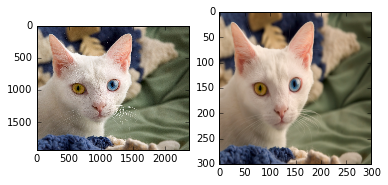

In [66]:
from scipy.misc import imread, imsave, imresize, imshow

# Read an JPEG image into a numpy array
img = imread('assets/cat.jpg')
print img.dtype, img.shape  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imsave('assets/cat_tinted.jpg', img_tinted)

%matplotlib inline
import matplotlib.pyplot as plt

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

## MATLAB files

The functions <b>scipy.io.loadmat</b> and <b>scipy.io.savemat</b> allow you to read and write MATLAB files. You can read about them in the documentation.


## Distance between points

SciPy defines some useful functions for computing distances between sets of points.

The function <b>scipy.spatial.distance.pdist</b> computes the distance between all pairs of points in a given set:

In [68]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print x

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
dist = pdist(x, 'euclidean')
print dist
d = squareform(pdist(x, 'euclidean'))
print d

[[0 1]
 [1 0]
 [2 0]]
[ 1.41421356  2.23606798  1.        ]
[[ 0.          1.41421356  2.23606798]
 [ 1.41421356  0.          1.        ]
 [ 2.23606798  1.          0.        ]]


## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the matplotlib.pyplot module, which provides a plotting system similar to that of MATLAB.


### Plotting

The most important function in matplotlib is plot, which allows you to plot 2D data. Here is a simple example:

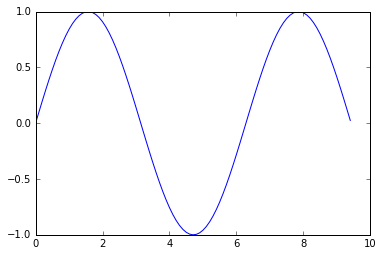

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

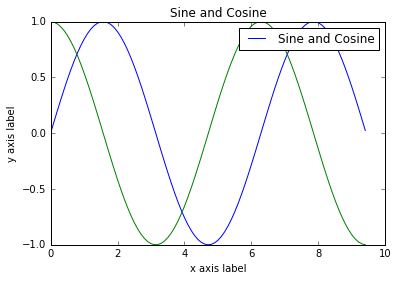

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine and Cosine'])
plt.show()

### Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

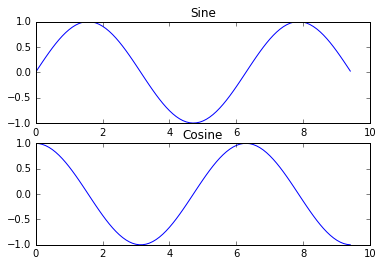

In [72]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.subplot(2,1,1)
plt.plot(x,y_sin)
plt.title('Sine')

plt.subplot(2,1,2)
plt.plot(x,y_cos)
plt.title('Cosine')

plt.show()


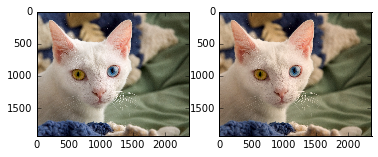

In [73]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()